In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
dataset= pd.read_excel('advertising_sales_data.xlsx')

In [17]:
x= dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values

In [18]:
print(x)
print(y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3   nan  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])
print(x)

[[230.1         37.8         69.2       ]
 [ 44.5         39.3         45.1       ]
 [ 17.2         45.9         69.3       ]
 [151.5         41.3         58.5       ]
 [180.8         10.8         58.4       ]
 [  8.7         48.9         75.        ]
 [ 57.5         32.8         23.5       ]
 [120.2         19.6         11.6       ]
 [  8.6          2.1          1.        ]
 [199.8          2.6         21.2       ]
 [ 66.1          5.8         24.2       ]
 [214.7         24.           4.        ]
 [ 23.8         35.1         65.9       ]
 [ 97.5          7.6          7.2       ]
 [204.1         32.9         46.        ]
 [195.4         47.7         52.9       ]
 [ 67.8         36.6        114.        ]
 [281.4         39.6         55.8       ]
 [ 69.2         20.5         18.3       ]
 [147.3         23.26060606  19.1       ]
 [218.4         27.7         53.4       ]
 [237.4          5.1         23.5       ]
 [ 13.2         15.9         49.6       ]
 [228.3         16.9         26.2 

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit( x_train, y_train)

LinearRegression()

In [22]:
y_pred= reg.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 2.4092185773771497
R2 Score: 0.8747286106321062


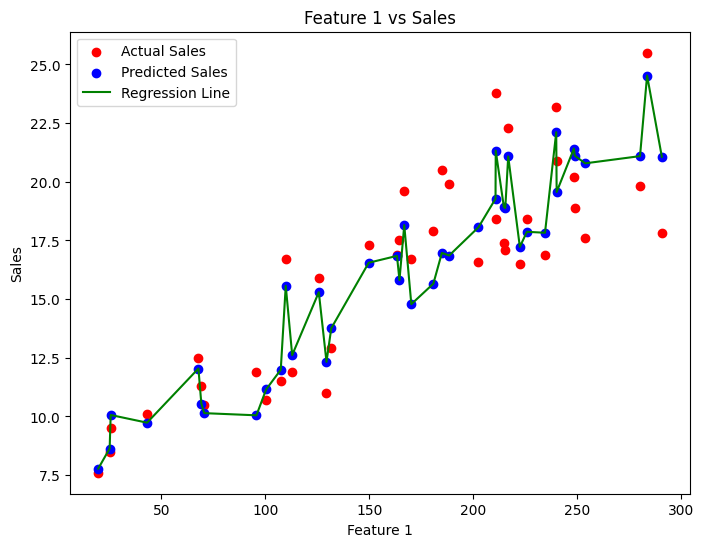

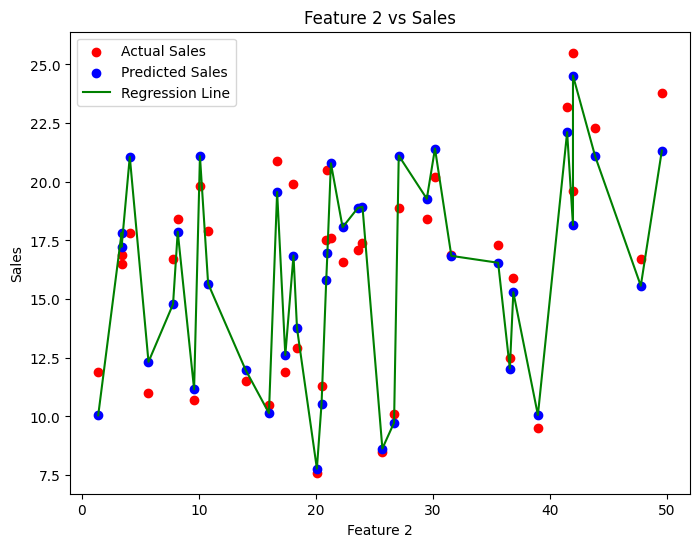

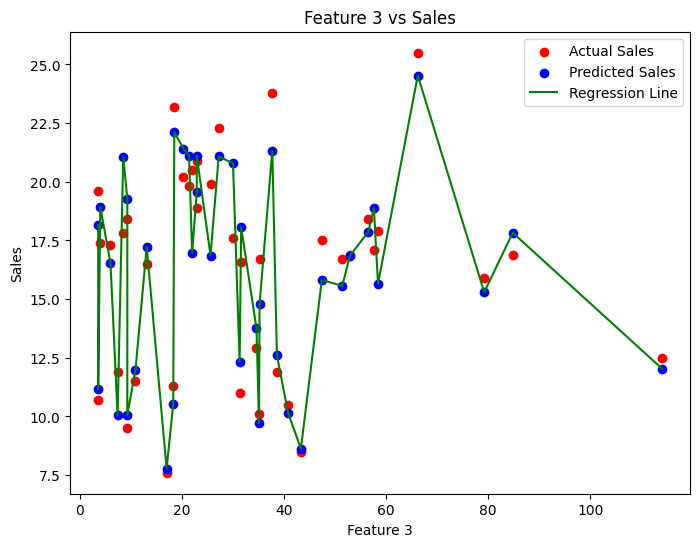

In [25]:
for i in range(x.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_test[:, i], y_test, color='red', label='Actual Sales')
    plt.scatter(x_test[:, i], y_pred, color='blue', label='Predicted Sales')
    sorted_idx = np.argsort(x_test[:, i])
    plt.plot(x_test[sorted_idx, i], y_pred[sorted_idx], color='green', label='Regression Line')
    plt.title(f'Feature {i+1} vs Sales')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()